In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import sys
import os

sys.path.append(os.path.abspath('../'))

del sys, os

In [123]:
import pandas as pd
import numpy as np
import models.vae
import models.gan
from torch import nn
import torch 
from time import time

In [14]:
import matplotlib.pyplot as plt

In [9]:
# LaTeX rendering in graphs
from distutils.spawn import find_executable

if find_executable('latex'):
    plt.rc('text', usetex=True)
else:
    print('LaTeX not found...')

plt.rc('font', family='serif')

# High resolution graphs
%config InlineBackend.figure_format = 'retina'

## Problem 3
### Qualitative Evaluation

In [9]:
vae = models.vae.VariationalAutoEncoder(svhn=True)
vae.load_state_dict(torch.load('../learning/vae_svhn.pth', map_location='cpu'))

### Visual Samples
We execute the cell below to obtain visual samples from the trained VAE. We note that the samples are relatively diverse, though they tend to focus more on individual digits. We also note the samples are quite blurry, which we can interpret as a consequence of the maximum-likelihood objective of Variational Autoencoders. Indeed, since VAEs are trained to maximize the log-likelihood for their inputs, areas of latent space "in-between" input points are given relatively high density, but nothing in the optimization leads us to believe they will have high resolution.

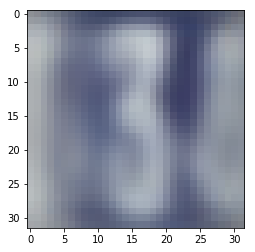

In [162]:
img = vae.sample_image(torch.device('cpu')).permute(1, 2, 0).detach().numpy()
plt.imshow(img)

We do the same for the GAN samples. TODO COMMENT

In [125]:
#gan = models.gan.GAN(torch.device('cpu'))
#gan.load_state_dict(torch.load('../learning/gan.pth', map_location='cpu'))

RuntimeError: Error(s) in loading state_dict for GAN:
	Missing key(s) in state_dict: "generator.6.weight", "generator.6.bias". 
	Unexpected key(s) in state_dict: "generator.10.weight", "generator.10.bias", "generator.5.weight", "generator.5.bias". 
	size mismatch for generator.8.weight: copying a param with shape torch.Size([16, 32, 3, 3]) from checkpoint, the shape in current model is torch.Size([3, 16, 3, 3]).
	size mismatch for generator.8.bias: copying a param with shape torch.Size([16]) from checkpoint, the shape in current model is torch.Size([3]).

### Checking for a Disentangled Representation

In [251]:
def plot_perturbation(model, idx):
    s1, s2 = model.perturb(idx, 2)
    s1 = s1.permute(1, 2, 0).detach().numpy()
    s2 = s2.permute(1, 2, 0).detach().numpy()
    fix, ax = plt.subplots(1,2)
    ax[0].imshow(s1)
    ax[1].imshow(s2)

### VAE

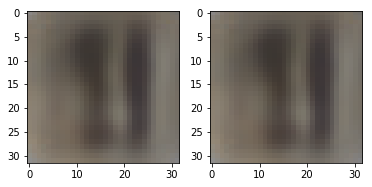

In [253]:
plot_perturbation(vae,idx=50)

### GAN

### Interpolations in Latent Space

### Interpolations in Data Space